In [18]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [20]:
#data preprocessing

y=train_data["label"]
X=train_data.drop(["label"], axis=1)

X_test=test_data

#splitting data
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)

#normalising the data
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255

#One hot encoding
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

#reshaping data
X_train=X_train.values.reshape((-1, 28, 28))
X_val=X_val.values.reshape((-1, 28, 28))
X_test=X_test.values.reshape((-1, 28, 28))

In [15]:
#creating the neural network model
model=Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-tr

In [16]:
#fitting the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.3, verbose=1)

Epoch 1/100
236/236 [==============================] - 4s 14ms/step - loss: 0.4468 - accuracy: 0.8642 - val_loss: 0.2249 - val_accuracy: 0.9349
Epoch 2/100
236/236 [==============================] - 3s 11ms/step - loss: 0.1641 - accuracy: 0.9503 - val_loss: 0.1516 - val_accuracy: 0.9553
Epoch 3/100
236/236 [==============================] - 3s 12ms/step - loss: 0.1075 - accuracy: 0.9671 - val_loss: 0.1274 - val_accuracy: 0.9612
Epoch 4/100
236/236 [==============================] - 3s 12ms/step - loss: 0.0784 - accuracy: 0.9759 - val_loss: 0.1243 - val_accuracy: 0.9619
Epoch 5/100
236/236 [==============================] - 3s 13ms/step - loss: 0.0544 - accuracy: 0.9823 - val_loss: 0.1206 - val_accuracy: 0.9662
Epoch 6/100
236/236 [==============================] - 3s 11ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.1175 - val_accuracy: 0.9683
Epoch 7/100
236/236 [==============================] - 3s 12ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.1280 - val_accuracy:

In [17]:
#evaluating the model
model.evaluate(X_val, y_val)


263/263 [==============================] - 2s 6ms/step - loss: 0.2588 - accuracy: 0.9763


[0.25875014066696167, 0.9763095378875732]

In [21]:
#predicting the test data
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)


875/875 [==============================] - 2s 2ms/step


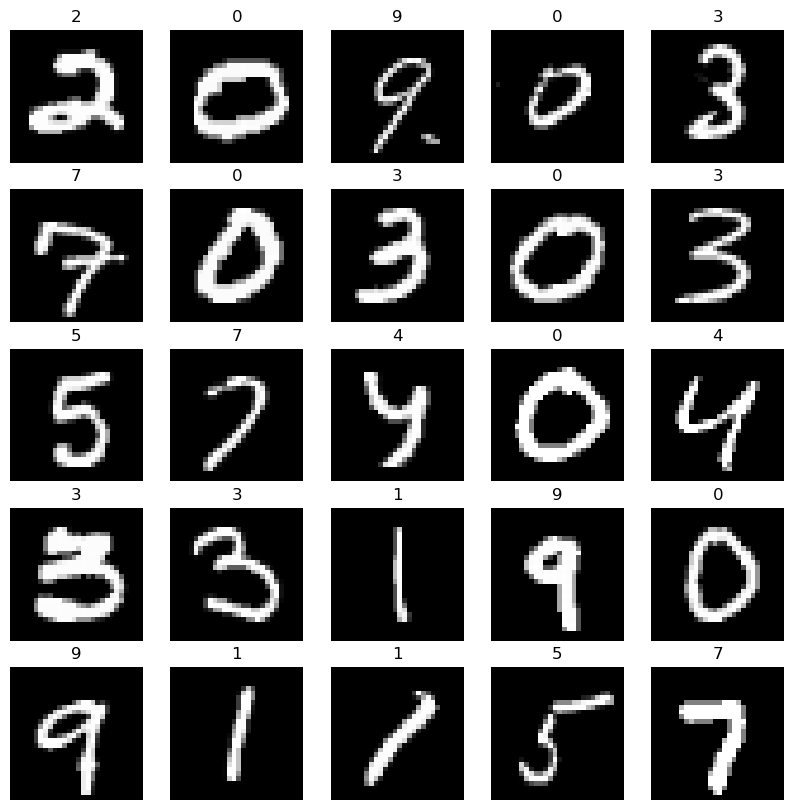

In [23]:
#plot data along with class labels
import matplotlib.pyplot as plt
import seaborn as sns

#plotting the data
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(y_pred[i])
    plt.axis("off")
plt.show()
